# Exploratory Data Analysis (EDA) for Sleep Monitoring Data

In this notebook, we'll dive deep into the accelerometer data and sleep logs, aiming to understand their structures, patterns, and any potential anomalies. This understanding is crucial to design effective preprocessing and modeling steps in later stages.


In [2]:
# Data imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load accelerometer training data
train_series = pd.read_parquet('../data/raw/train_series.parquet')

# Load sleep logs for training data
train_events = pd.read_csv('../data/raw/train_events.csv')

Let's start by examining the first few rows of each dataset to get a sense of the data's structure.

In [4]:
display(train_series.head())
train_series.describe()

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.6367,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.6368,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.6370,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.6368,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.6368,0.0215


,step,anglez,enmo
count,1.279463e+08,1.279463e+08,1.279463e+08
mean,2.548048e+05,-8.810453e+00,4.131503e-02
std,1.778930e+05,3.015709e+01,9.743801e-02
min,0.000000e+00,-9.000000e+01,0.000000e+00
25%,1.158120e+05,-3.185890e+01,1.300000e-03
50%,2.345190e+05,-9.597900e+00,1.720000e-02
75%,3.571960e+05,1.130020e+01,4.370000e-02
max,1.433879e+06,9.000000e+01,1.143370e+01


In [5]:
display(train_events.head())
train_events.describe()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


,night,step
count,14510.000000,9587.00000
mean,15.118952,214330.96610
std,10.286598,141264.08126
min,1.000000,936.00000
25%,7.000000,95418.00000
50%,14.000000,200556.00000
75%,21.000000,317472.00000
max,84.000000,739392.00000


From the preliminary exploration, we can gather a few insights:
- `train_series` contains accelerometer readings such as `anglez` and `enmo`.
- `train_events` contains information about sleep events.

For the `train_series` dataset:

- `step` reaches 1.43 million, a significant volume of individual readings that should be converted into a time series.
- `anglez` has values ranging from -90 to 90, with a mean of roughly -8.81. The standard deviation is quite high (around 30), suggesting variability in the readings.
- `enmo` ranges from 0 to about 11.43 with a mean of 0.0413. Given its standard deviation (0.0974), most values are close to zero, but there might be occasional spikes or movements.


To ensure the integrity of our data:
1. Confirm that each series in `train_events.csv` corresponds to a series in `train_series.parquet`.
2. Validate that timestamps in `train_events.csv` match up with the steps in the associated series.

In [10]:
# Extract unique series IDs from both datasets
series_ids_train = set(train_series['series_id'].unique())
series_ids_events = set(train_events['series_id'].unique())

# Check if sets are equal
assert series_ids_train == series_ids_events, "Mismatch between series in the training data and sleep logs."

Visualizations will provide a more intuitive understanding of the readings. We'll plot histograms for `anglez` and `enmo` and then visualize a sample series to discern patterns, if any.

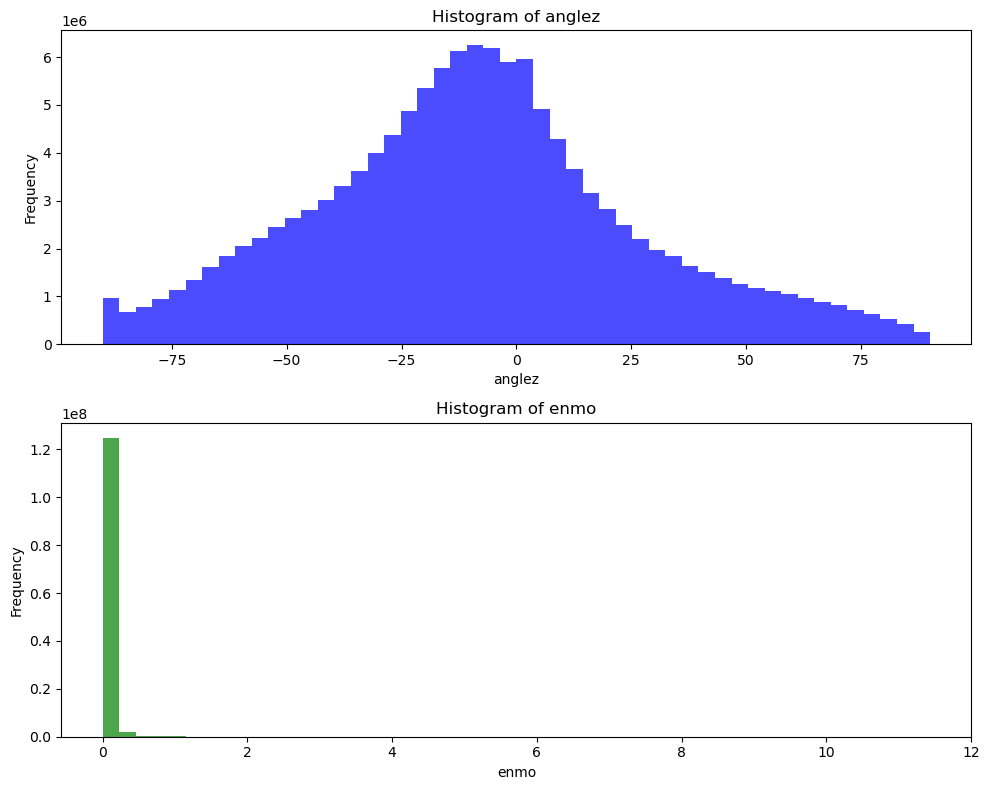

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot anglez histogram
axs[0].hist(train_series['anglez'], bins=50, color='blue', alpha=0.7)
axs[0].set_title('Histogram of anglez')
axs[0].set_xlabel('anglez')
axs[0].set_ylabel('Frequency')

# Plot enmo histogram
axs[1].hist(train_series['enmo'], bins=50, color='green', alpha=0.7)
axs[1].set_title('Histogram of enmo')
axs[1].set_xlabel('enmo')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The visualizations help us realize a few things of interest:
- `anglez` seems normally distributed with a heavier bottom.
- `senmo` is very skewed, with very high 0.0-0.33 counts and sparse counts there after.

To further understand the data, let's plot both `anglez` and `enmo` for a sample series.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


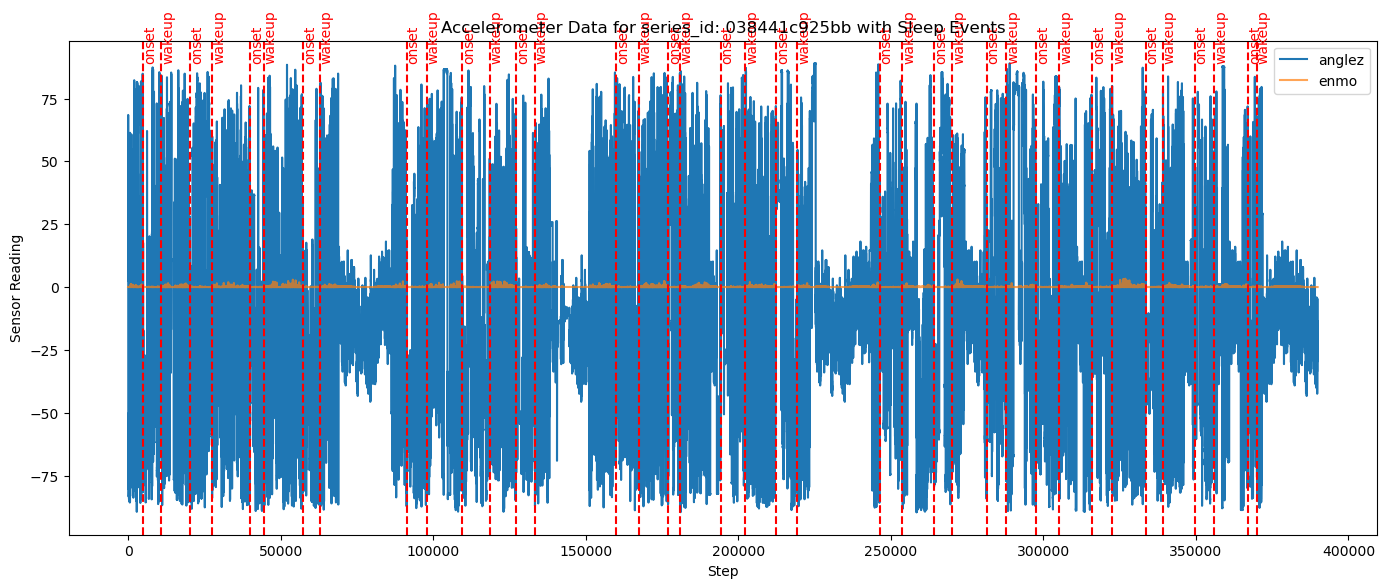

In [14]:
sample_series = train_series[train_series['series_id'] == '038441c925bb']
events = train_events[train_events['series_id'] == '038441c925bb']

plt.figure(figsize=(14, 6))
plt.plot(sample_series['step'], sample_series['anglez'], label='anglez')
plt.plot(sample_series['step'], sample_series['enmo'], label='enmo', alpha=0.7)

# Mark events
for _, row in events.iterrows():
    plt.axvline(x=row['step'], color='red', linestyle='--')
    plt.text(row['step'], sample_series['anglez'].max(), row['event'],
             rotation=90, verticalalignment='bottom', color='red')

plt.title('Accelerometer Data for series_id: 038441c925bb with Sleep Events')
plt.xlabel('Step')
plt.ylabel('Sensor Reading')
plt.legend()
plt.tight_layout()
plt.show()


The visualization of the series helps us realize a few things of interest:
- A single series id contains information related to multiple related events (onset-wakeup). As such, re-formatting of the observations has to take place by step/time into a pattern that is appropriate.
- Visually, we can observe that patterns may exist among both `anglez` and `enmo` before, during, and after events. This could inform us that series information can likely capture 
- `anglez` seems normally distributed with a heavier bottom.
- `senmo` is very skewed, with very high 0.0-0.33 counts and sparse counts there after.

Next, we should take a look at the events. Identifying when to create the series is not obvious, and we should therefore take a data-driven approach to that analysis. 

In [14]:


# Function to convert time object to seconds since midnight
def time_to_seconds(t):
    return (t.hour * 3600) + (t.minute * 60) + t.second

# Convert 'timestamp' column to datetime format in UTC
train_events['timestamp'] = pd.to_datetime(train_events['timestamp'], utc=True)

# Split the dataframe into onset and wakeup dataframes
df_onset = train_events[train_events['event'] == 'onset'].reset_index(drop=True)
df_wakeup = train_events[train_events['event'] == 'wakeup'].reset_index(drop=True)

# Convert time to seconds for onset and wakeup
df_onset['seconds'] = df_onset['timestamp'].dt.time.apply(time_to_seconds)
df_wakeup['seconds'] = df_wakeup['timestamp'].dt.time.apply(time_to_seconds)

# Compute average time in seconds for onset and wakeup
avg_onset_seconds = df_onset['seconds'].mean()
avg_wakeup_seconds = df_wakeup['seconds'].mean()

# Convert average seconds back to time format
typical_onset_time = pd.to_datetime(avg_onset_seconds, unit='s').time()
typical_wakeup_time = pd.to_datetime(avg_wakeup_seconds, unit='s').time()

# Calculate sleep duration in seconds for each event
df_wakeup['duration_seconds'] = df_wakeup['seconds'] - df_onset['seconds']

# Handle cases where sleep crosses midnight (negative durations)
df_wakeup['duration_seconds'] = df_wakeup['duration_seconds'].apply(lambda x: x if x > 0 else 24*3600 + x)

# Compute average sleep duration in seconds
avg_duration_seconds = df_wakeup['duration_seconds'].mean()

# Convert average sleep duration seconds to hours, minutes, and seconds format
avg_duration_hours = int(avg_duration_seconds // 3600)
avg_duration_minutes = int((avg_duration_seconds % 3600) // 60)
avg_duration_seconds = int(avg_duration_seconds % 60)

# Format the results into a comprehensive analysis
analysis_output = f"""
Analysis of Sleep Patterns:

- The typical onset (start of sleep) time is approximately {typical_onset_time.strftime('%H:%M:%S')}.
- The typical wakeup (end of sleep) time is approximately {typical_wakeup_time.strftime('%H:%M:%S')}.
- The average duration of sleep is about {avg_duration_hours} hours, {avg_duration_minutes} minutes, and {avg_duration_seconds} seconds.

Note: These results are based on the provided dataset and may not be representative of the broader population.
"""

print(analysis_output)



Analysis of Sleep Patterns:

- The typical onset (start of sleep) time is approximately 03:34:38.
- The typical wakeup (end of sleep) time is approximately 11:44:45.
- The average duration of sleep is about 8 hours, 38 minutes, and 24 seconds.

Note: These results are based on the provided dataset and may not be representative of the broader population.



The results show that the average sleep duration is ~8.5h, and the onset and wakeup times suggest that the timezone selected (UTC) is likely not precise; however, it can still be useful as we'll likely exclude specific time features, or use the same timezone standard for all. 

In summary, our data displays many properties that strongly encourage the processing of data. Namely, creation of series, standardization and normalization of data, addition of time-based features, and other time-derived features seeking to capture patterns.  